In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Load the data

In [6]:
trainfile = 'data/sat.trn'
testfile = 'data/sat.tst'

colnames = [i for i in range(36)]
colnames.append('terrain')

train = pd.read_csv(trainfile, sep='\s+', names=colnames)
test = pd.read_csv(testfile, sep='\s+', names=colnames)

In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,terrain
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [8]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,terrain
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [9]:
xcols = train.columns[:-1]
ycol = train.columns[-1]

In [10]:
train[xcols] = train[xcols].astype(float)
test[xcols] = test[xcols].astype(float)

In [11]:
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('svc', SVC())
])

In [12]:
coarse_params = {
    'svc__gamma': [0.01, 0.1, 1.0, 10.0],
    'svc__C': np.logspace(-3, 3, 7)
}

In [13]:
gs = GridSearchCV(pipeline, param_grid=coarse_params, cv=5)

In [14]:
%%time
gs.fit(train[xcols], train[ycol].values.ravel())

CPU times: user 2min 58s, sys: 339 ms, total: 2min 58s
Wall time: 42min 36s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__gamma': [0.01, 0.1, 1.0, 10.0], 'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
gs.best_params_

{'svc__C': 1.0, 'svc__gamma': 0.1}

In [16]:
fine_params = {
    'svc__C': np.logspace(-1, 2, 10),
    'svc__gamma': np.logspace(-2, 0, 10)
}

In [17]:
%%time
gs2 = GridSearchCV(pipeline, param_grid=fine_params, cv=5)
gs2.fit(train[xcols], train[ycol].values.ravel())

CPU times: user 5min 35s, sys: 323 ms, total: 5min 35s
Wall time: 5min 36s


In [18]:
gs2.best_params_

{'svc__C': 2.1544346900318834, 'svc__gamma': 0.0774263682681127}

In [19]:
gs2.score(test[xcols], test[ycol].values.ravel())

0.914

In [20]:
np.logspace(-1, 2, 10)

array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ])

In [21]:
np.logspace(-2, 0, 10)

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

In [22]:
very_fine_params = {
    'svc__C': np.linspace(1.0, 4.64158883),
    'svc__gamma': np.linspace(0.04641589, 0.12915497)
}

In [23]:
gs3 = GridSearchCV(pipeline, param_grid=very_fine_params, cv=5)
gs3.fit(train[xcols], train[ycol].values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': array([1.     , 1.07432, 1.14864, 1.22295, 1.29727, 1.37159, 1.44591,
       1.52023, 1.59455, 1.66886, 1.74318, 1.8175 , 1.89182, 1.96614,
       2.04045, 2.11477, 2.18909, 2.26341, 2.33773, 2.41204, 2.48636,
       2.56068, 2.635  , 2.70932, 2.78364, 2.85795, 2.93227, 3.00659...96, 0.11565,
       0.11734, 0.11902, 0.12071, 0.1224 , 0.12409, 0.12578, 0.12747,
       0.12915])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
gs3.score(test[xcols], test[ycol].values.ravel())

0.9115

In [26]:
gs3.best_params_

{'svc__C': 1.817499533265306, 'svc__gamma': 0.07343273244897959}

Text(83.40000000000006, 0.5, 'True class')

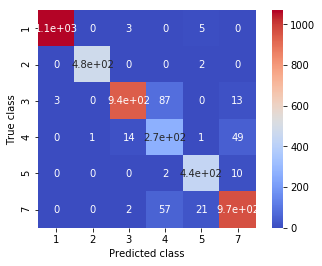

In [40]:
labels = [f'{i}' for i in [1,2,3,4,5,7]]
sns.heatmap(confusion_matrix(gs3.predict(train[xcols]), 
                             train[ycol]), 
            cmap='coolwarm', square=True, annot=True, 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted class")
plt.ylabel("True class")

In [41]:
print(classification_report(gs3.predict(train[xcols]), train[ycol]))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      1077
           2       1.00      1.00      1.00       480
           3       0.98      0.90      0.94      1045
           4       0.65      0.81      0.72       334
           5       0.94      0.97      0.96       453
           7       0.93      0.92      0.93      1046

   micro avg       0.94      0.94      0.94      4435
   macro avg       0.92      0.93      0.92      4435
weighted avg       0.95      0.94      0.94      4435



Text(0.5, 1.0, 'Test data')

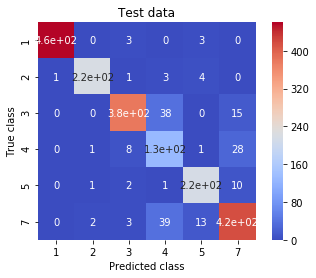

In [70]:
labels = [f'{i}' for i in [1,2,3,4,5,7]]
sns.heatmap(confusion_matrix(gs3.predict(test[xcols]), 
                             test[ycol]), 
            cmap='coolwarm', square=True, annot=True, 
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Test data")

In [31]:
print(classification_report(gs3.predict(test[xcols]), test[ycol]))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       466
           2       0.98      0.96      0.97       229
           3       0.96      0.88      0.92       433
           4       0.62      0.77      0.69       168
           5       0.91      0.94      0.93       230
           7       0.89      0.88      0.88       474

   micro avg       0.91      0.91      0.91      2000
   macro avg       0.89      0.90      0.90      2000
weighted avg       0.92      0.91      0.91      2000



This underpredicted the number of class 4 instances, possibly because they were the least represented in the sample set.

In [45]:
svc = Pipeline([
    ('scale', StandardScaler()), 
    ('svc', SVC(class_weight='balanced', C=1.817499533265306, gamma=0.07343273244897959))
])

In [46]:
svc.fit(train[xcols], train[ycol].values.ravel())

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.817499533265306, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.07343273244897959,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [50]:
print(classification_report(svc.predict(test[xcols]), test[ycol]))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       461
           2       0.97      0.96      0.97       226
           3       0.90      0.91      0.91       396
           4       0.77      0.63      0.69       260
           5       0.95      0.91      0.93       248
           7       0.80      0.92      0.86       409

   micro avg       0.90      0.90      0.90      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.90      0.90      2000



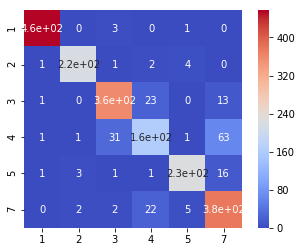

In [52]:
sns.heatmap(
    confusion_matrix(svc.predict(test[xcols]), test[ycol]),
    annot=True, square=True, cmap='coolwarm',
    xticklabels=labels, yticklabels=labels
)

Nope! Didn't really help much!

In [53]:
svc.score(test[xcols], test[ycol])

0.9005

In fact it got worse

# PCA

In [55]:
from sklearn.decomposition import PCA

In [64]:
xs = StandardScaler().fit_transform(train[xcols])
pca = PCA().fit(xs)

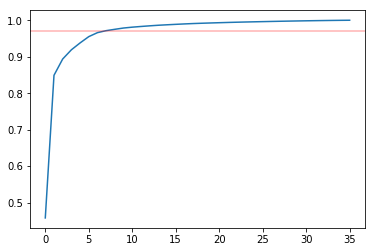

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.97, color='r', alpha=0.3)

Looks like 97% of the variance can be captured with relatively few components

In [66]:
np.where(np.cumsum(pca.explained_variance_ratio_) < 0.97)

(array([0, 1, 2, 3, 4, 5, 6]),)

In [67]:
pipe2 = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=0.97)),
    ('svc', SVC())
])

In [68]:
gs4 = GridSearchCV(pipe2, param_grid=coarse_params, cv=5)
gs4.fit(train[xcols], train[ycol].values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=0.97, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__gamma': [0.01, 0.1, 1.0, 10.0], 'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
print(classification_report(gs4.predict(test[xcols]), test[ycol]))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98       469
           2       0.97      0.96      0.97       226
           3       0.96      0.87      0.91       436
           4       0.59      0.76      0.66       165
           5       0.89      0.92      0.91       230
           7       0.88      0.87      0.87       474

   micro avg       0.90      0.90      0.90      2000
   macro avg       0.88      0.89      0.89      2000
weighted avg       0.91      0.90      0.91      2000

